In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
lab_df = pd.read_csv(r'C:\Users\Arvind Balyan\Desktop\AayushTCD\allData\LAB_DATA_with_SENSOR_data_MAIN_for_ANALYSIS.csv')

In [65]:
def return_date(value):
    '''this function returns the date from a given value'''
    return pd.to_datetime(str(value), errors = 'ignore')

In [66]:
lab_df['date'] = lab_df.Date.apply(return_date)

In [67]:
bod = lab_df[lab_df['date'] == '2019-12-16']['BOD ppm']

In [68]:
bod = bod.astype('float64')

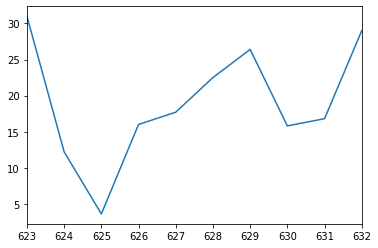

In [69]:
bod.plot()

In [70]:
array = np.linspace(0, len(bod) - 1, 815) #815 is the number of real time observations for 16 dec 2019 yamuna

In [71]:
array_bod = [] #initialisation of an empty array for storing bod values
for i in range(len(bod) - 1):
    for j in array:
        if (j >=i) & (j <=i + 1):
            slope = round(bod.iloc[i+1] - bod.iloc[i], 2)
            array_bod.append(slope*j + round(-slope*i + bod.iloc[i], 2))

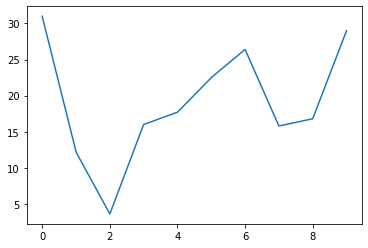

In [72]:
plt.plot(array, array_bod)

In [74]:
tc = lab_df[lab_df['date'] == '2019-12-16']['TC cfu/100ml']
tc = tc.astype('float64')

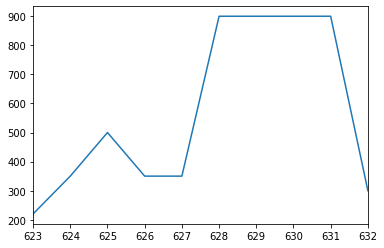

In [75]:
tc.plot()

In [78]:
array_tc = [] #initialisation of an empty array for storing bod values
for i in range(len(tc) - 1):
    for j in array:
        if (j >=i) & (j <=i + 1):
            slope = round(tc.iloc[i+1] - tc.iloc[i], 2)
            array_tc.append(slope*j + round(-slope*i + tc.iloc[i], 2))

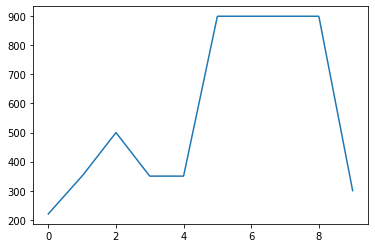

In [79]:
plt.plot(array, array_tc)

In [86]:
cols = ['Date', 'Time', 'pH ', 'EC[muS per cm]', 'D.O.[ppm]', 'GPS Lat.', 'GPS Long.']
df = pd.read_csv(r'C:\Users\Arvind Balyan\Desktop\AayushTCD\allData\allSensorData\YMNA_DELH_20191216_Consolidated.csv', usecols = cols)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 7 columns):
Date              815 non-null object
Time              815 non-null object
pH                815 non-null float64
EC[muS per cm]    815 non-null int64
D.O.[ppm]         815 non-null float64
GPS Lat.          815 non-null float64
GPS Long.         815 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 44.7+ KB


In [88]:
df['bod'] = array_bod
df['tc'] = array_tc

In [95]:
df.rename(columns = {
    'pH ':'ph',
    'EC[muS per cm]':'ec',
    'D.O.[ppm]':'do',
    'GPS Lat.':'lat',
    'GPS Long.':'long'
}, inplace = True)

In [96]:
df.sample(10)

,Date,Time,ph,ec,do,lat,long,bod,tc
154,16/12/19,13:31:28,7.48,1553,2.38,28.68421,77.23062,6.156757,455.405405
372,16/12/19,14:07:48,7.40,1739,2.37,28.69287,77.22939,18.242506,412.162162
321,16/12/19,13:59:18,7.39,1489,3.49,28.69515,77.22923,16.933538,350.000000
390,16/12/19,14:10:48,7.41,1682,2.37,28.69161,77.22958,19.197789,521.621622
711,16/12/19,15:04:18,7.55,1584,2.39,28.66313,77.24319,16.661179,900.000000
142,16/12/19,13:29:28,7.46,1590,2.37,28.68187,77.23101,7.297789,435.503686
493,16/12/19,14:27:58,7.43,1736,2.37,28.68399,77.23094,24.258354,900.000000
291,16/12/19,13:54:18,7.40,1802,2.37,28.69601,77.22928,16.369656,350.000000
194,16/12/19,13:38:08,7.44,1640,2.37,28.69131,77.22958,5.397543,478.255528
524,16/12/19,14:33:08,7.58,1320,2.41,28.68093,77.23277,25.595086,900.000000


In [102]:
def calculate_do_index(value):
    '''this function returns the DO index for the input value of DO ppm'''
    if value <= 40:
        return value * 0.66 + 0.18
    elif (value > 40) & (value <= 100):
        return -13.55+1.17 * value
    else:
        return 163.34-0.62*value
    
def calculate_bod_index(value):
    '''this function returns the value of BOD index for the input value of average BOD'''
    if value <= 10:
        return 96.67 - 7 * value
    elif (value > 10) & (value <= 30):
        return 38.9 - 1.23 * value
    else:
        return 2
    
def calculate_ph_index(value):
    '''this function returns the value of pH index for the input value of average pH'''
    if value <= 2:
        return 0
    elif (value > 2) & (value <= 5):
        return 16.1 + 7.35*value
    elif (value > 5) & (value <= 7.3):
        return -142.67 + 33.5*value
    elif (value > 7.3) & (value <= 10):
        return 316.96 - 29.85*value
    elif (value <= 12) & (value > 10):
        return 96.17 - 8*value
    else:
        return 0

#clear the confusion below for TC or FC
def calculate_tc_index(value):
    '''this function returns the value of TC index for the input value of average faecal coliform'''
    if (value > 1) & (value <= 172):
        return 97.2 - 26.6*np.log10(value)
    elif (value > 1000) & (value <= 100000):
        return 42.33-7.75*np.log10(value)
    else:
        return 2

In [103]:
def calculate_wqi(do, bod, ph, tc):
    '''this function returns wqi for the input values of do, bod, ph, and tc'''
    return do*0.31 + bod*0.19 + ph*0.22 + tc*0.28

def check_drinking_safe(do, bod, ph, tc):
    '''this function takes the value of ph, do, bod, and tc and returns 1 if the water is safe'''
    if (do >= 6) & (bod <= 2) & (tc <= 50) & (ph >= 6.5) & (ph <= 8.5):
        return 1
    else:
        return 0

def check_bathing_safe(do, bod, ph, tc):
    '''this function takes the value of ph, do, bod, and tc and returns 1 if the water is safe'''
    if (do >= 5) & (bod <= 3) & (tc <= 500) & (ph <=8.5) & (ph >= 6.5):
        return 1
    else:
        return 0

def check_industrial_safe(ph, ec):
    '''this function takes the value of ph, and ec returns 1 if the water is safe'''
    if (ph >= 6) & (ph <= 8.5) & (ec <= 2250):
        return 1
    else:
        return 0

In [105]:
df['ph_index'] = df.ph.apply(calculate_ph_index)
df['tc_index'] = df.tc.apply(calculate_tc_index) #i am using tc here, check that again
df['bod_index'] = df.bod.apply(calculate_bod_index)
df['do_index'] = df.do.apply(calculate_do_index)

df['drinking_safe'] = df.apply(lambda x: check_drinking_safe(x.do, x.bod, x.ph, x.tc), axis = 1)
df['bathing_safe'] = df.apply(lambda x: check_bathing_safe(x.do, x.bod, x.ph, x.tc), axis = 1)
df['industrial_safe'] = df.apply(lambda x: check_industrial_safe(x.ph, x.ec), axis = 1)

df['wqi'] = df.apply(lambda x: calculate_wqi(x.do_index, x.bod_index, x.ph_index, x.tc_index), axis = 1)

Text(0.5, 1.0, 'Plot showing real time WQI for the boat ride on 16th December 2019, Yamuna')

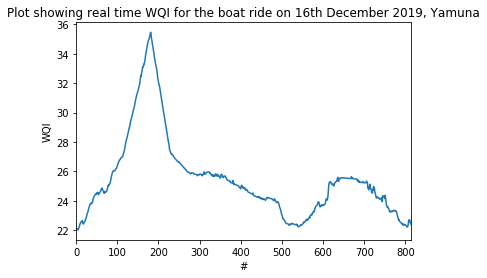

In [114]:
df.wqi.plot()
plt.xlabel('#')
plt.ylabel('WQI')
plt.title('Plot showing real time WQI for the boat ride on 16th December 2019, Yamuna')